In [3]:
# cca --> complete case analysis
# df --> missing data ---> filter missing data --->
# new_df = filtered_columns_in_which_we_have_missing_data

#new_df --> missing_data_drop


#architecture --> histogram --->

#post column in which we hace missing data

#update coloumns in which we have no missing data

# if past data architecture is overlap to new data rchitecture --> it means we can drop  missig data

# if past data architecture is not overlap to new data architeture ---> it means we cant drop data



In [4]:
import numpy as np
import pandas as pd


In [5]:
df=pd.read_csv('dsjob.csv')
               

In [6]:
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
5,217,city_23,0.899,Male,No relevent experience,Part time course,Masters,STEM,10,NaN,NaN,2,12
6,21465,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,<1,100-500,Pvt Ltd,1,11
7,27302,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,>4,81
8,12994,city_173,0.878,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,2
9,16287,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,NaN,3,50-99,Funded Startup,1,4


In [7]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [8]:
# get the those columns name which are  average under the range 0.05 between
cols= [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean()]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [9]:
df.sample()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
409,32545,city_103,0.92,Male,Has relevent experience,no_enrollment,Masters,STEM,20,10/49,Early Stage Startup,1,56


In [10]:
df['education_level'].value_counts() # choose any coloums according to you on whcih you want to applyes 

education_level
Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: count, dtype: int64

In [11]:
len(df[cols].dropna())/len(df)

0.9478628464067638

In [12]:
new_df = df[cols].dropna()
df.shape,new_df.shape

((2129, 13), (2018, 4))

In [14]:
import matplotlib.pyplot as plt

<Axes: >

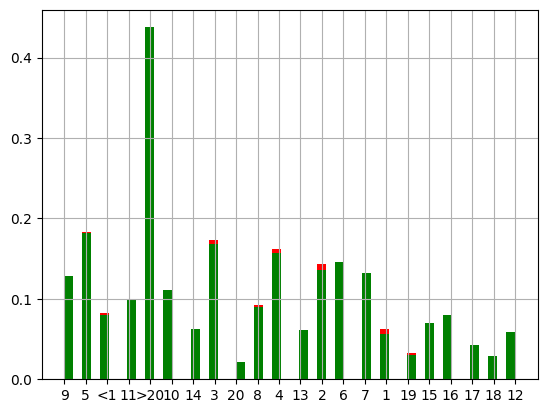

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)

#Original data
df['experience'].hist(bins=50,ax=ax,density=True,color ="red")
# data after cca, the argumentthe color transfort, so we can see the overlay of 2 dimensions
new_df['experience'].hist(bins=50,ax=ax,density=True,color ="green")       

In [17]:
temp=pd.concat([
    # percentage of observation per category, original data 
    df['enrolled_university'].value_counts()/len(df),
    #percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts() / len(new_df)
],
   axis=1)
# add column names
temp.columns=['original','cca']
temp
               
    
    

,original,cca
enrolled_university,,
no_enrollment,0.713481,0.727948
Full time course,0.204321,0.202180
Part time course,0.067637,0.069871
